In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

当我们处理线性可分的数据集时，可以使用 SVC(kernel='linear') 方法来训练数据
当然我们也可以使用更快的方法 LinearSVC 来训练数据，特别是当训练集特别大或特征非常多的时候。
当我们处理非线性 SVM 分类时，可以使用高斯 RBF 内核，多项式内核，sigmoid 内核来进行非线性模型的的拟合。
当然我们也可以通过 GridSearchCV 寻找最优参数。

In [2]:
# 直接读取网络文件
df = pd.read_csv('https://blog.caiyongji.com/assets/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


该数据集模拟了一项医学研究，对感染病毒的小白鼠使用不同剂量的两种药物，观察两周后小白鼠是否感染病毒。

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

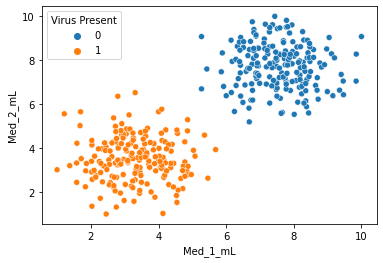

In [3]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

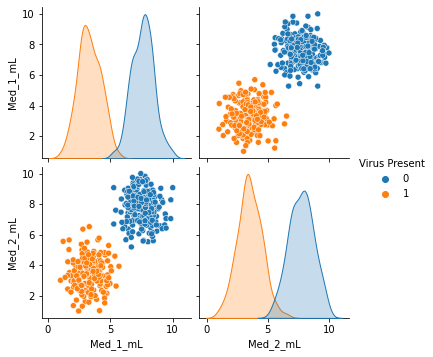

In [4]:
# 通过 pairplot 方法绘制特征两两之间的对应关系
sns.pairplot(df,hue='Virus Present')

我们可以做出大概的判断，当加大药物剂量可使小白鼠避免被感染。

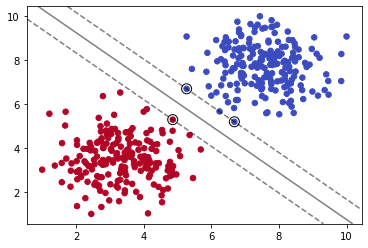

In [5]:
# 使用 SVM 训练数据集
# SVC: Supprt Vector Classifier 支持向量分类器
# SVC 是 SVM 的一种实现
from sklearn.svm import SVC

# 准备数据
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)  # 取前两列

# 定义模型
# C: L2 正则, C 值越大正则化强度越弱，其必须严格为正
model = SVC(kernel='linear', C=1000)  

# 训练模型
model.fit(X, y)

# 绘制图像
# 定义绘制 SVM 边界方法
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none',
               edgecolors='k')
    plt.show()

plot_svm_boundary(model,X,y)

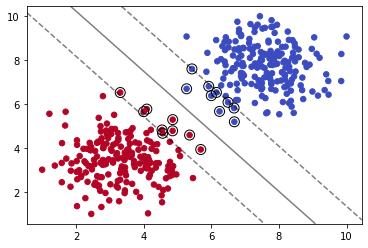

In [7]:
# 减少 C，增大正则，数据拟合减弱
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## 核技巧

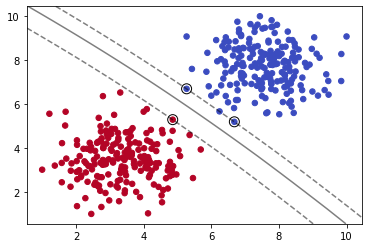

In [8]:
# 多项式内核
model = SVC(kernel='poly', C=0.05, degree=5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

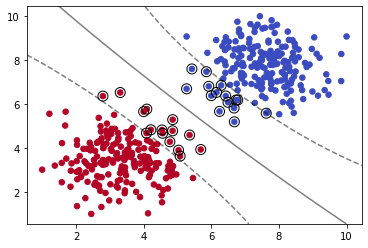

In [12]:
# 高斯 RBF 内核
# SVC方法默认内核为高斯 RBF 即 Radial Basis Function（径向基函数）
# 这时我们需要引入 gamma 参数来控制钟形函数的形状。
# 增加 gamma 值会使钟形曲线变得更窄，因此每个实例影响的范围变小，决策边界更不规则。
# 减小gamma值会使钟形曲线变得更宽，因此每个实例的影响范围变大，决策边界更平坦。

model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [13]:
# 调参技巧：网格搜索
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    'C':[0.01,0.1,1],
    'kernel':['rbf','poly','linear','sigmoid'],
    'gamma':[0.01,0.1,1]
}

grid = GridSearchCV(svm, param_grid)

grid.fit(X, y)

print("grid.best_params_ = ",
      grid.best_params_,
      ", grid.best_score_ =",
      grid.best_score_)

grid.best_params_ =  {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'} , grid.best_score_ = 1.0
